In [1]:
#Import the modules we need.
%matplotlib inline
import datetime

from matplotlib import pyplot as plt 
import numpy as np
from types import SimpleNamespace
import json
import datetime as dt

import sys
sys.path.extend(["py/txUtils/", "py/tid/", "py/davitPy/"])
from fetchUtils import FetchData
import music
import plotting


IMPORTANT: Please make sure to cite pyDARN in publications that use plots created by pyDARN using DOI: https://zenodo.org/record/3727269. Citing information for SuperDARN data is found at https://pydarn.readthedocs.io/en/master/user/citing/


In [2]:
# Load a specific event observed in multiple radars
rads = ["wal"]
dates = [
    dt.datetime(2011,5,9,8),
    dt.datetime(2011,5,9,19)
]
fds = FetchData.fetch(rads, dates)

In [3]:
dataObj     = music.musicArray(fds[rads[0]], sTime=dates[0],eTime=dates[1], fovModel='GS')

In [4]:
dataObj.get_data_sets()

['DS000_originalFit']

In [5]:
dataObj.DS000_originalFit.printMetadata()

channel: 0
code: wal
coords: geo
cp: -503
dType: dmap
dataSetName: DS000_originalFit
eTime: 2011-05-09 19:00:00
elevation: None
fType: fitacf
gscat: 1
model: GS
name: Wallops Island
param: p_l
sTime: 2011-05-09 08:00:00
serial: 0
stid: 32


In [6]:
dataObj.DS000_originalFit.printHistory()

2023-01-26 16:53:52.620104 [DS000_originalFit] Original Fit Data


In [7]:
dataObj.active.printHistory()

2023-01-26 16:53:52.620104 [DS000_originalFit] Original Fit Data


/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/davitPy/plotting.py: 774: UserWarning: FixedFormatter should only be used together with FixedLocator


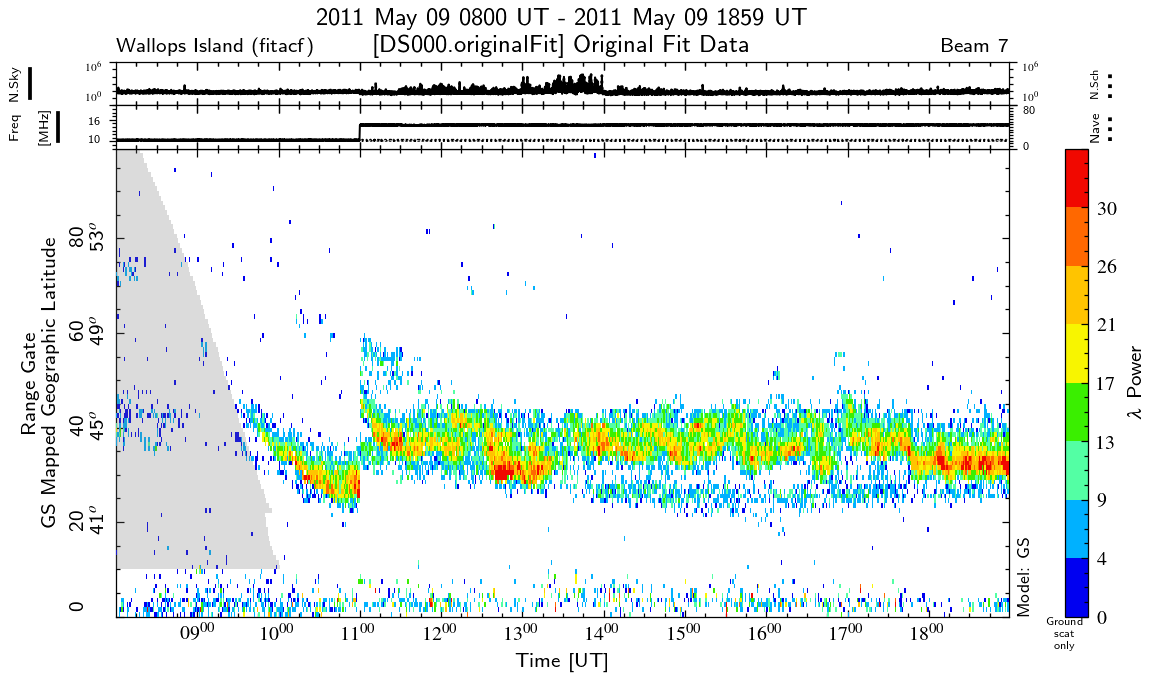

In [8]:
fig = plotting.musicRTI(dataObj)

In [9]:
# # We can also make a fan plot.
# plotTime = datetime.datetime(2011,5,9,14)
# fig = plotting.musicFan(dataObj,time=plotTime)

/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/davitPy/plotting.py: 774: UserWarning: FixedFormatter should only be used together with FixedLocator


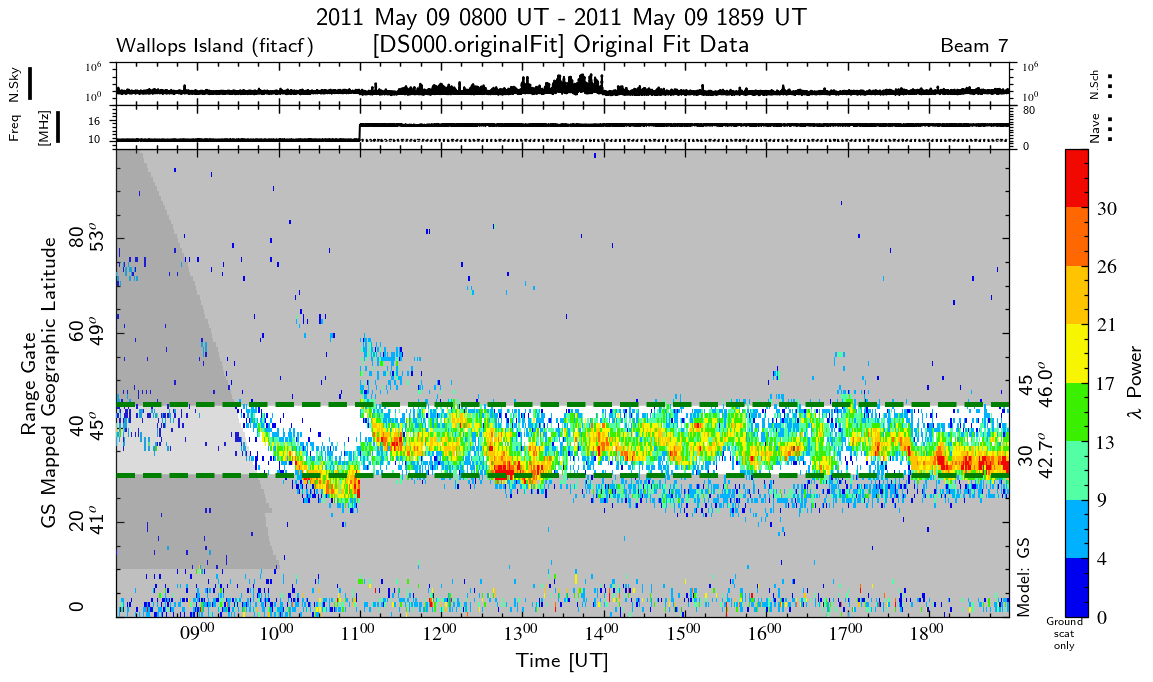

In [10]:
music.defineLimits(dataObj,gateLimits=[30,45])
fig = plotting.musicRTI(dataObj)

/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/davitPy/plotting.py: 774: UserWarning: FixedFormatter should only be used together with FixedLocator


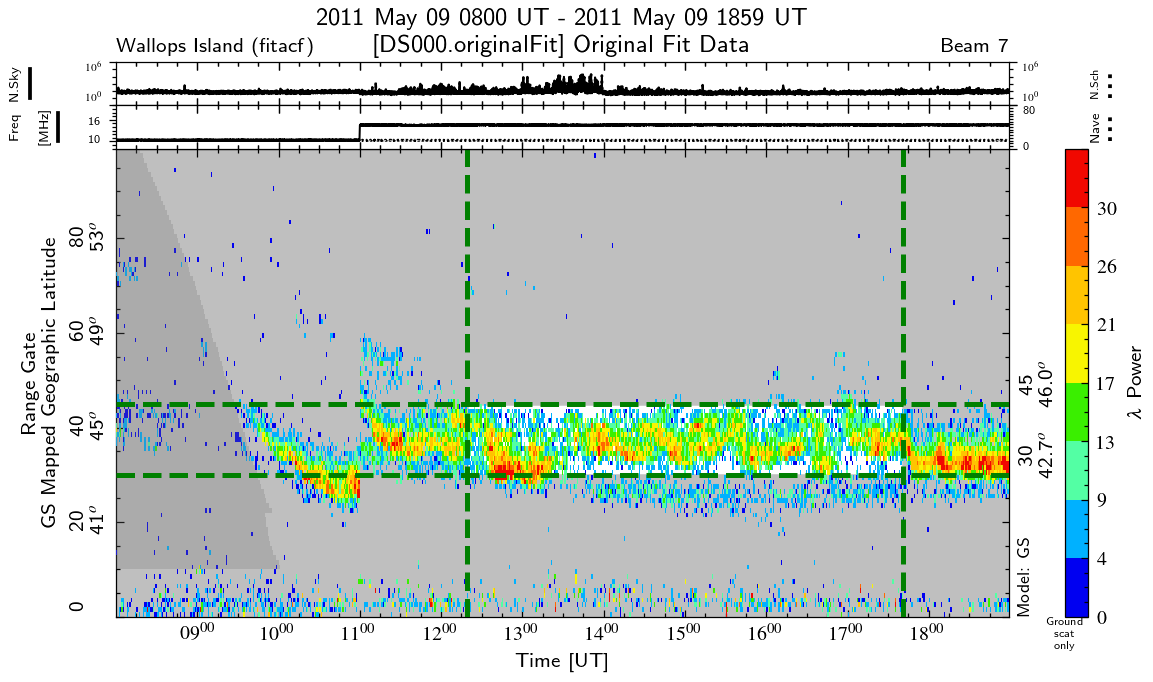

In [11]:
numtaps = 101
timeres = 120

#Let's also say that we are interested in the MSTID feature between 1400 and 1600 UT.
sTime_of_interest = datetime.datetime(2011,5,9,14)
eTime_of_interest = datetime.datetime(2011,5,9,16)

#Now calculate the new start and end times...
new_times = music.filterTimes(sTime_of_interest, eTime_of_interest, timeres, numtaps)
music.defineLimits(dataObj,timeLimits=new_times)

fig = plotting.musicRTI(dataObj)

/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/davitPy/plotting.py: 774: UserWarning: FixedFormatter should only be used together with FixedLocator


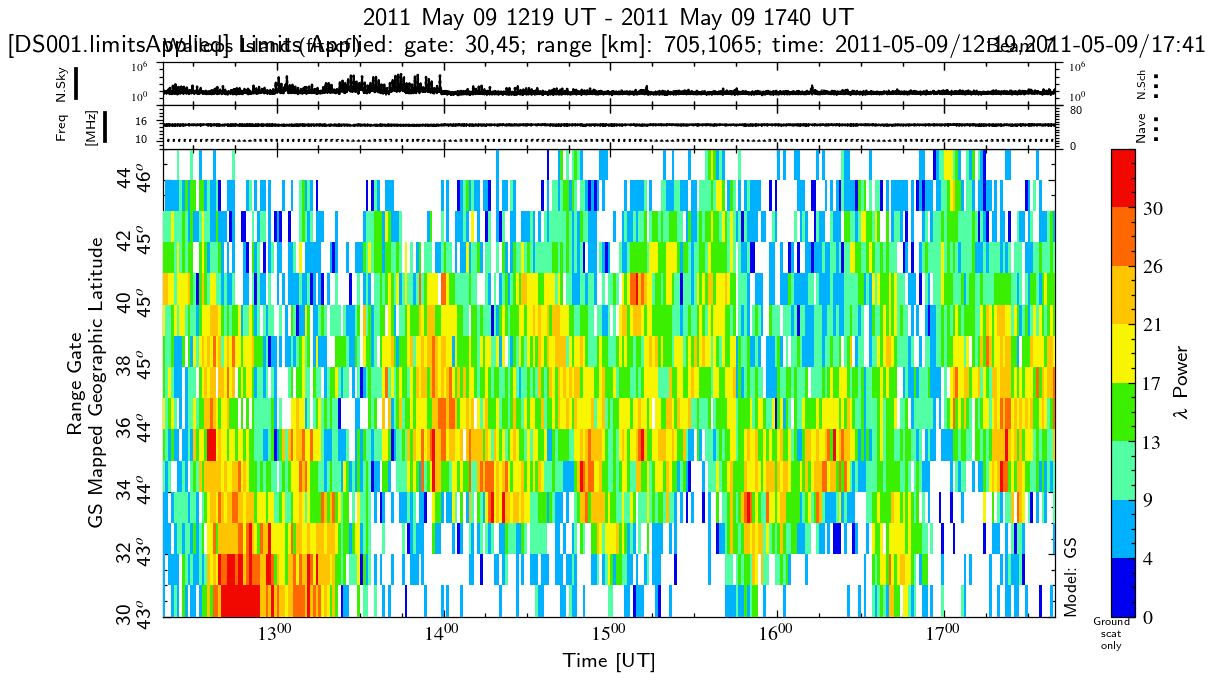

In [12]:
dataObj.active.applyLimits()
plotting.musicRTI(dataObj)

In [13]:
dataObj.get_data_sets()

['DS000_originalFit', 'DS001_limitsApplied']

In [14]:
dataObj.active.printHistory()

2023-01-26 16:53:52.620104 [DS000_originalFit] Original Fit Data
2023-01-26 16:54:00.122086 [DS001_limitsApplied] Limits Applied: gate: 30,45; range [km]: 705,1065; time: 2011-05-09/12:19,2011-05-09/17:41


In [15]:
music.beamInterpolation(dataObj)

In [16]:
music.timeInterpolation(dataObj,timeRes=timeres)
plotting.timeSeriesMultiPlot(dataObj,dataSet='timeInterpolated',dataSet2='beamInterpolated')

In [17]:
music.determineRelativePosition(dataObj)

In [18]:
filt = music.filter(dataObj, numtaps=numtaps, cutoff_low=0.0003, cutoff_high=0.0012)

In [19]:
fig = filt.plotTransferFunction(xmax=0.004)
fig = filt.plotImpulseResponse()

/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/davitPy/plotting.py: 774: UserWarning: FixedFormatter should only be used together with FixedLocator


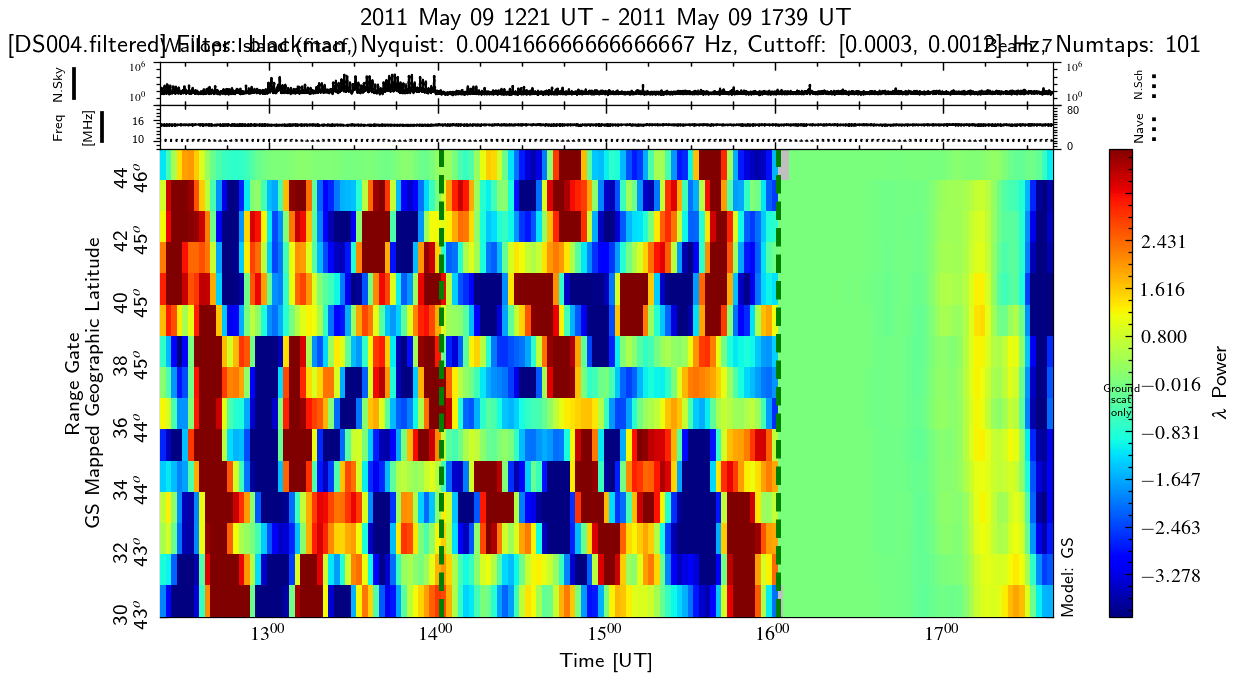

In [20]:
# Let's look at the filtered RTI plot.  We should set autoScale to True since the magnitudes will be much
# lower than the original data.
plotting.musicRTI(dataObj,autoScale=True)

In [ ]:
dataObj.active.applyLimits()
plotting.musicRTI(dataObj,autoScale=True)

In [ ]:
dataObj.active.printHistory()

In [ ]:
music.calculateFFT(dataObj)

In [23]:
# We can look at the spectrum of select cells...
plotting.spectrumMultiPlot(dataObj,xlim=(-0.0025,0.0025))
plotting.spectrumMultiPlot(dataObj,plotType='magnitude',xlim=(0,0.0025))
plotting.spectrumMultiPlot(dataObj,plotType='phase',xlim=(0,0.0025))

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f8fce3bd630> (for post_execute):


RuntimeError: latex was not able to process the following string:
b'Selected Cells: [DS005_limitsApplied] Calculated FFT'

Here is the full report generated by latex:
This is pdfTeX, Version 3.1415926-2.5-1.40.14 (TeX Live 2013/Debian)
 restricted \write18 enabled.
entering extended mode

(/home/shibaji/.cache/matplotlib/tex.cache/ab09acf723bcf3b417cb8e02b0a2c396.tex
LaTeX2e <2011/06/27>
Babel <3.9h> and hyphenation patterns for 78 languages loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2007/10/19 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/mathptmx.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty))
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amstext.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsgen.sty))
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsbsy.sty)
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsopn.sty))
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amssymb.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amsfonts.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
No file ab09acf723bcf3b417cb8e02b0a2c396.aux.
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/ot1ptm.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\sffamily Selected Cells: [DS005_
                                       limitsApplied] Calculated FFT}
No pages of output.
Transcript written on ab09acf723bcf3b417cb8e02b0a2c396.log.




RuntimeError: latex was not able to process the following string:
b'Selected Cells: [DS005_limitsApplied] Calculated FFT'

Here is the full report generated by latex:
This is pdfTeX, Version 3.1415926-2.5-1.40.14 (TeX Live 2013/Debian)
 restricted \write18 enabled.
entering extended mode

(/home/shibaji/.cache/matplotlib/tex.cache/ab09acf723bcf3b417cb8e02b0a2c396.tex
LaTeX2e <2011/06/27>
Babel <3.9h> and hyphenation patterns for 78 languages loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2007/10/19 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/mathptmx.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty))
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amstext.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsgen.sty))
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsbsy.sty)
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsopn.sty))
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amssymb.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amsfonts.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
No file ab09acf723bcf3b417cb8e02b0a2c396.aux.
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/ot1ptm.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\sffamily Selected Cells: [DS005_
                                       limitsApplied] Calculated FFT}
No pages of output.
Transcript written on ab09acf723bcf3b417cb8e02b0a2c396.log.




<Figure size 12000x6000 with 9 Axes>

RuntimeError: latex was not able to process the following string:
b'Selected Cells: [DS005_limitsApplied] Calculated FFT'

Here is the full report generated by latex:
This is pdfTeX, Version 3.1415926-2.5-1.40.14 (TeX Live 2013/Debian)
 restricted \write18 enabled.
entering extended mode

(/home/shibaji/.cache/matplotlib/tex.cache/ab09acf723bcf3b417cb8e02b0a2c396.tex
LaTeX2e <2011/06/27>
Babel <3.9h> and hyphenation patterns for 78 languages loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2007/10/19 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/mathptmx.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty))
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amstext.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsgen.sty))
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsbsy.sty)
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsopn.sty))
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amssymb.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amsfonts.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
No file ab09acf723bcf3b417cb8e02b0a2c396.aux.
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/ot1ptm.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\sffamily Selected Cells: [DS005_
                                       limitsApplied] Calculated FFT}
No pages of output.
Transcript written on ab09acf723bcf3b417cb8e02b0a2c396.log.




<Figure size 12000x6000 with 9 Axes>

RuntimeError: latex was not able to process the following string:
b'Selected Cells: [DS005_limitsApplied] Calculated FFT'

Here is the full report generated by latex:
This is pdfTeX, Version 3.1415926-2.5-1.40.14 (TeX Live 2013/Debian)
 restricted \write18 enabled.
entering extended mode

(/home/shibaji/.cache/matplotlib/tex.cache/ab09acf723bcf3b417cb8e02b0a2c396.tex
LaTeX2e <2011/06/27>
Babel <3.9h> and hyphenation patterns for 78 languages loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2007/10/19 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/mathptmx.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty))
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amstext.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsgen.sty))
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsbsy.sty)
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsopn.sty))
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amssymb.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amsfonts.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
No file ab09acf723bcf3b417cb8e02b0a2c396.aux.
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/ot1ptm.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\sffamily Selected Cells: [DS005_
                                       limitsApplied] Calculated FFT}
No pages of output.
Transcript written on ab09acf723bcf3b417cb8e02b0a2c396.log.




<Figure size 12000x6000 with 9 Axes>

In [25]:
plotting.plotFullSpectrum(dataObj,xlim=(0,0.00175))

{'cbar_pcoll': <matplotlib.collections.PolyCollection at 0x7f47fdb27340>,
 'cbar_label': 'ABS(Spectral Density)'}

In [26]:
music.calculateDlm(dataObj)
plotting.plotDlm(dataObj)

In [27]:
music.calculateKarr(dataObj)
plotting.plotKarr(dataObj)

/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/plotting.py: 2663: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/plotting.py: 2680: UserWarning: FixedFormatter should only be used together with FixedLocator


In [28]:
dataObj.active.printHistory()

2023-01-20 12:34:13.154164 [DS000_originalFit] Original Fit Data
2023-01-20 12:34:25.085957 [DS001_limitsApplied] Limits Applied: gate: 30,45; range [km]: 705,1065; time: 2011-05-09/12:19,2011-05-09/17:41
2023-01-20 12:34:28.424425 [DS002_beamInterpolated] Beam Linear Interpolation
2023-01-20 12:34:28.675602 [DS003_timeInterpolated] Time Linear Interpolation
2023-01-20 12:34:32.756342 [DS004_filtered] Filter: blackman, Nyquist: 0.004166666666666667 Hz, Cuttoff: [0.0003, 0.0012] Hz, Numtaps: 101
2023-01-20 12:34:41.379161 [DS005_limitsApplied] Limits Applied: time: 2011-05-09/14:01,2011-05-09/16:01
2023-01-20 12:34:44.892876 [DS005_limitsApplied] Calculated FFT
2023-01-20 12:34:59.600334 [DS005_limitsApplied] Calculated Cross-Spectral Matrix Dlm
2023-01-20 12:35:15.599783 [DS005_limitsApplied] Calculated kArr


In [29]:
music.detectSignals(dataObj)
plotting.plotKarr(dataObj)

ImportError: dlopen: cannot load any more object with static TLS
It seems that scikit-image has not been built correctly.

Your install of scikit-image appears to be broken.
Try re-installing the package following the instructions at:
https://scikit-image.org/docs/stable/install.html 